In [9]:
import cv2
import numpy as np
import pandas as pd
import neoapi
import time
import timeit
import matplotlib.pyplot as plt

In [6]:
# Use same setting as data collection

#Camera Settings 220
camera = neoapi.Cam()  # Create camera object
camera.Connect('700006383766')  # Connect to camera 959 (cryo)
camera.f.ExposureTime.Set(20) # Set exposure time
camera.f.Width.value = 48# will set the value to the closest possible value 
camera.f.Height.value = 48 #Height Value   
camera.f.OffsetY.value = 132  
camera.f.OffsetX.value = 512
camera.f.Gain.value = 1         
camera.f.AcquisitionFrameRateEnable.value = True
camera.f.AcquisitionFrameRate.value = 8000 #fps
print("camera ok")

time.sleep(1)

img = camera.GetImage().GetNPArray()    

              
        
camera.Disconnect()




camera ok


<neoapi.neoapi.Cam; proxy of <Swig Object of type 'NeoAPI::Cam *' at 0x7af7138b7db0> >

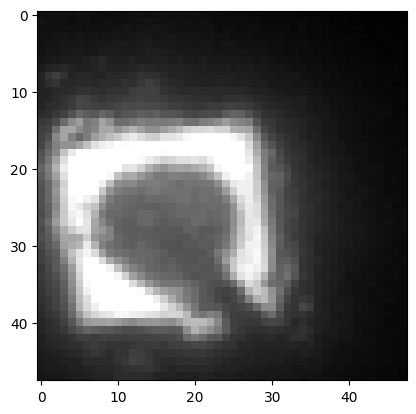

In [10]:
plt.imshow(img, cmap='gray') # Look at the image

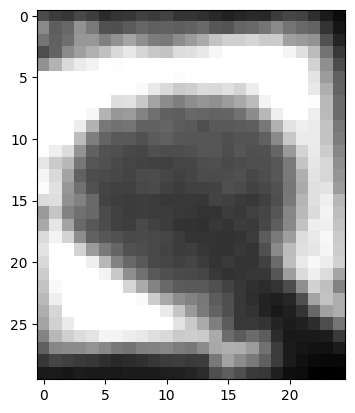

In [24]:
# Manually Crop Template
# Make it a square

plt.imshow(img[13:43,5:30], cmap='gray') 

In [25]:
np.save('template.npy' ,img[13:43,5:30].squeeze()) # Save Temp

In [5]:
dat = np.load('template.npy')

In [41]:
dat.shape

(30000, 2)

In [42]:
5000*60*10

3000000

In [39]:
np.save('location_test.npy',[[1,1],[2,2]])

In [54]:
something = np.load('location_test.npy')

In [55]:
something.shape

(18000001, 2)

In [37]:
5000*60

300000

In [52]:
import numpy as np
import fcntl

def read_locations(file_path):
    with open(file_path, 'rb') as f:
        fcntl.flock(f, fcntl.LOCK_SH)
        location_list = np.load(f)
        fcntl.flock(f, fcntl.LOCK_UN)
    return location_list

# Read the locations
file_path = 'location_test.npy'
locations = read_locations(file_path)
locations.shape


(30000001, 2)

In [48]:
locations = locations[1:]
print('done1')
# Extract x and y coordinates from filtered positions
x_values = [pos[0] for pos in locations]
print('done2')

y_values = [pos[1] for pos in locations]
print('done3')

done1
done2
done3


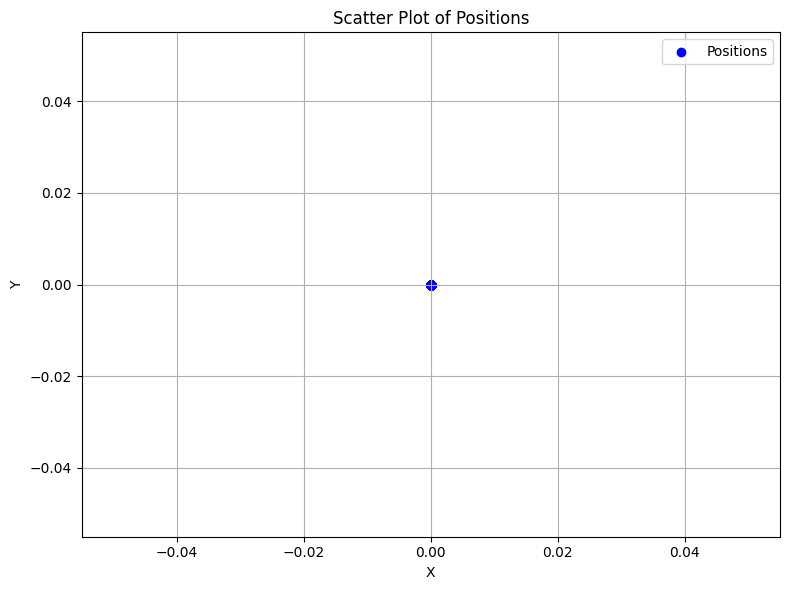

In [50]:
start = 0
stop = 1000  #len(locations)
# Create the scatter plot
plt.figure(figsize=(8, 6))  # Optional: specify figure size

plt.scatter(x_values[start:stop], y_values[start:stop], color='blue', marker='o', label='Positions')
plt.title('Scatter Plot of Positions')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.tight_layout()

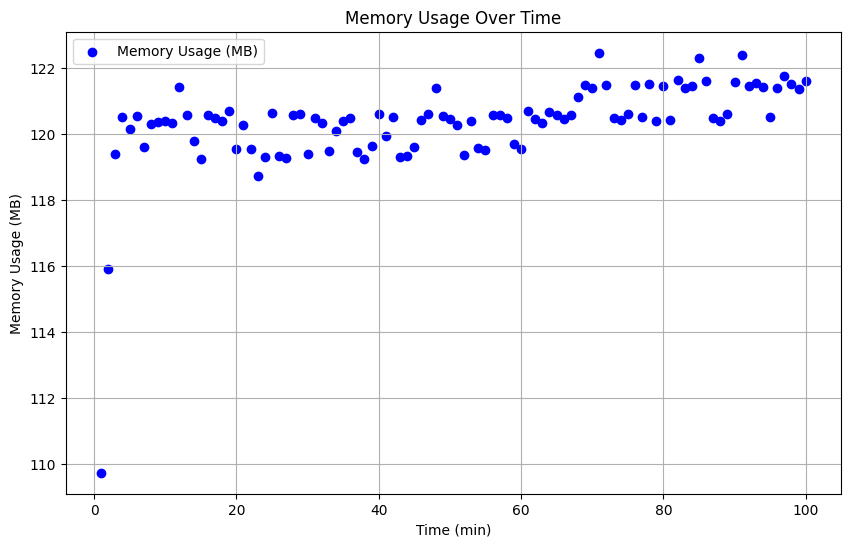

In [54]:
import numpy as np
import matplotlib.pyplot as plt

file_path = 'memory_usage.npy'  # Replace with your actual file path
memory_data = np.load(file_path)

# Generate timestamps assuming 1-second intervals
timestamps = np.arange(1,len(memory_data)+1)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(timestamps, memory_data, label='Memory Usage (MB)', color='blue', marker='o')

# Adding titles and labels
plt.title('Memory Usage Over Time')
plt.xlabel('Time (min)')
plt.ylabel('Memory Usage (MB)')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


In [35]:
print(memory_data)

[ 99.8671875 100.3671875 100.8671875 ... 135.046875  135.046875
 135.046875 ]
